## Tarea 11: Métodos Computacionales Taller
### Gabriel Cataño Sánchez

In [1]:
# Librerías

import numpy as np
from scipy.integrate import odeint 
import matplotlib.pylab as plt
import numpy as np


# Oscilador Armónico

Este programa soluciona una ecuación diferencial de un oscilador armónico.
\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\beta \frac{\mathrm{d}x}{\mathrm{d}t} + \omega_0^2 x = A \sin\omega t
\end{equation}



In [2]:
# Función ecuación diferencial oscilador forzado
def func(x, t, params):
  OM_0 = params[0]
  B    = params[1]
  a0   = params[2]
  OM   = params[3]
 
  dxdt =  x[1]
  dvdt =  - (OM_0**2) * x[0]  -  2*B * x[1] + a0 * np.sin(OM * t) 
  return [dxdt, dvdt]

In [3]:
# Condiciones iniciales

# Posicion inicial
x_0 = 0   #m

# Velocidad inicial
x_1 = 2   #m/s

# Lista de condiciones iniciales
x0 = np.array([x_0, x_1]) 

# Tiempo de integracion
t =np.linspace(0, 5, 10000)  

# Oscilador armónico simple, no forzado ni amortiguado

In [4]:
# Masa
m = 0.1  # kg

# Constante elástica del resorte
k = 2    # N/m

# Coeficiente de rozamiento
b = 0.4  

# Frecuencia natural
omega0 = np.pi*np.sqrt(k/m)

# Coeficiente de friccion
beta   = 0 # 4*np.sqrt(k*m) 

# Frecuencia función de forzamiento
omega =  0   

# Amplitud del  de forzamiento
A0 = 0        


params = [omega0, beta, A0, omega   ]

x = odeint(func, x0, t, args=(params, ) )

In [5]:
# Posicion en el tiempo
x1 = x[:,0] 

# Velocidad en el tiempo
x2 = x[:,1] 

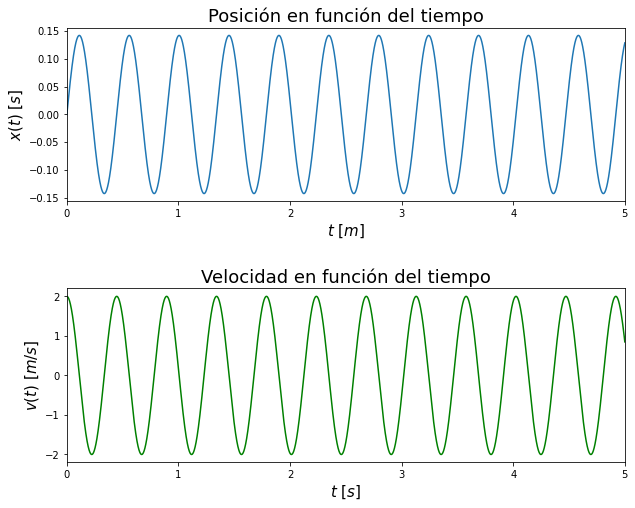

In [6]:

fig1=plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(t, x1) 
plt.title('Posición en función del tiempo', size = 18)
plt.xlabel("$t$ $[m]$", size = 15)    
plt.ylabel("$x(t)$ $[s]$", size = 15) 
plt.xlim(0,5)
plt.subplot(212)
plt.plot(t,x2,color="green")  
plt.title('Velocidad en función del tiempo', size = 18)
plt.xlabel("$t$ $[s]$", size = 15)    
plt.ylabel("$v(t)$ $[m/s]$", size = 15) 
plt.xlim(0,5)
plt.subplots_adjust(hspace=0.5)
plt.show()



# Oscilador armónico forzado

In [7]:
# Masa
m = 0.1  # kg

# Constante elástica del resorte
k = 2    # N/m

# Coeficiente de rozamiento
b = 0.4  

# Frecuencia natural
omega0 = np.pi*np.sqrt(k/m)

# Coeficiente de friccion
beta   = b/(4*m)

# Frecuencia función de forzamiento
omega =  20  # rad/s   

# Amplitud del  de forzamiento
A0 = 15       


params = [omega0, beta, A0, omega   ]

xf = odeint(func, x0, t, args=(params, ) )

In [8]:
# Posicion en el tiempo
xf1 = xf[:,0] 

# Velocidad en el tiempo
xf2 = xf[:,1] 

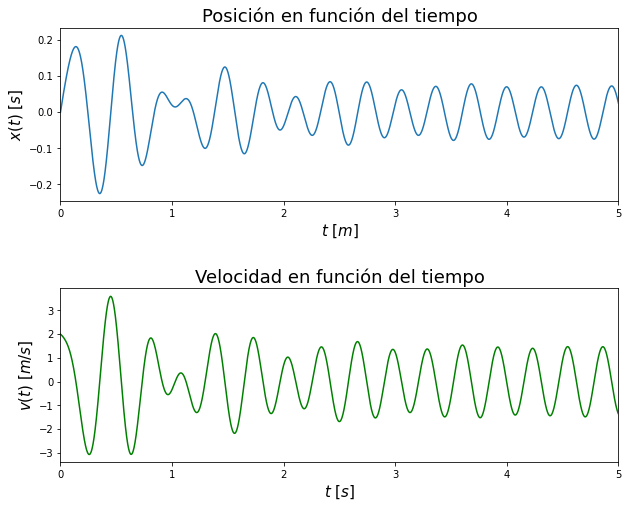

In [9]:
fig1=plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(t, xf1) 
plt.title('Posición en función del tiempo', size = 18)
plt.xlabel("$t$ $[m]$", size = 15)    
plt.ylabel("$x(t)$ $[s]$", size = 15) 
plt.xlim(0,5)
plt.subplot(212)
plt.plot(t,xf2,color="green")  
plt.title('Velocidad en función del tiempo', size = 18)
plt.xlabel("$t$ $[s]$", size = 15)    
plt.ylabel("$v(t)$ $[m/s]$", size = 15) 
plt.xlim(0,5)
plt.subplots_adjust(hspace=0.5)
plt.show()

# Caída libre amortiguada


\begin{equation}
\frac{\mathrm{d}^2 y } {\mathrm{d} t^2} + \beta v - g = 0
\end{equation}

Transformando las ecuacions tenemos que:

\begin{equation}
\frac{\mathrm{d} y } {\mathrm{d} t} = v
\end{equation}


\begin{equation}
\frac{\mathrm{d}v } {\mathrm{d} t}= - \beta v + g
\end{equation}




In [10]:
# Función ecuacipon diferencial

def func_paracaidista(y, t, params):
  Beta = params[0]
  g = params[1]
 
  dydt =  y[1]
  dvdt =  -beta * y[1] + g
 
  return [dydt, dvdt]

In [11]:
# Condiciones iniciales
# Posicion inicial
y_0 = 0 

# Velocidad inicial
v_0 = -1E-8    

# Lista de condiciones iniciales
y0 = np.array([y_0, v_0]) 

# Tiempo de integracion
t = np.linspace(0, 20, 10000)    


In [12]:
# Coeficiente de friccion
beta = 0.4 

# Aceleración de la gravedad
g = 9.8  #m/s^2

params = [beta, g]
y = odeint(func_paracaidista, x0, t, args=(params, ) )

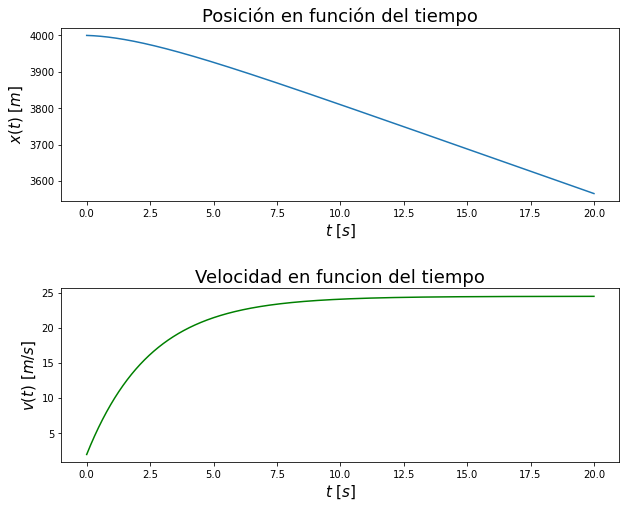

In [13]:
# Posicion en el tiempo
y1 = 4000*np.ones(len(y[:,0])) - y[:,0] 

# Velocidad en el tiempo
y2 = y[:,1] 

fig1 = plt.figure(figsize = (10,8))

plt.subplot(211)
plt.plot(t, y1)
plt.title('Posición en función del tiempo', size = 18)
plt.xlabel("$t$ $[s]$", size = 15)   
plt.ylabel("$x(t)$ $[m]$", size = 15) 

plt.subplot(212)
plt.plot(t,y2,color="green")  
plt.title('Velocidad en funcion del tiempo', size = 18)
plt.xlabel("$t$ $[s]$", size = 15)   
plt.ylabel("$v(t)$ $[m/s]$", size = 15) 
plt.subplots_adjust(hspace=0.5)
plt.show()






# Ejercicios : Solucionar el sistema de ecuaciones acopladas.

\begin{equation}
m_1 \frac{ \mathrm{d}^2 x_1 }{\mathrm{d}t^2} = -k_1 x_1 + k_2 (x_2-x_1)
\end{equation}


\begin{equation}
m_2 \frac{ \mathrm{d}^2 x_2 }{\mathrm{d}t^2} = -k_3 x_2 - k_2 (x_2-x_1)
\end{equation}


Solución de las ecuaciones *acopladas*.
\begin{equation}
\frac{dx_1}{dt} = v_1
\end{equation}

\begin{equation}
\frac{dv_1}{dt} = - \frac{k}{m} x_1 + \frac{k_2}{m} (x_2-x_1) 
\end{equation}


Solución de las ecuaciones *acopladas*.
\begin{equation}
\frac{dx_2}{dt} = v_2
\end{equation}

\begin{equation}
\frac{dv_2}{dt} = - \frac{k}{m} x_2 - \frac{k_2}{m} (x_2-x_1) 
\end{equation}




Para la solucion:


\begin{equation}
\frac{dx_1}{dt} = v_1
\end{equation}

\begin{equation}
\frac{dx_2}{dt} = v_2
\end{equation}

\begin{equation}
\frac{dv_1}{dt} = - \frac{k}{m} x_1 + \frac{k_2}{m} (x_2-x_1) 
\end{equation}


\begin{equation}
\frac{dv_2}{dt} = - \frac{k}{m} x_2 - \frac{k_2}{m} (x_2-x_1) 
\end{equation}


In [14]:
# Función ecuación diferencial

def func(x, t, params):

  k = params[0] 
  k12   = params[1] 
  m    = params[2] 
 
  dx1dt = x[2]    # dx1dt=v 
  dx2dt = x[3]    # dx1dt=v
  
  dv1dt = -(k / m) * x[0] + (k12 / m) * (x[1] - x[0])
  dv2dt = -(k / m) * x[1] - (k12 / m) * (x[1] - x[0])

  return [dx1dt, dx2dt, dv1dt,  dv2dt ] 

In [21]:
def CI(x_0=1E-3, x_1 = -1E-3,v_0=1E-10 ,v_1=1E-10):
  # Lista de condiciones iniciales
  return  np.array([x_0,x_1, v_0, v_1]) 

# Tiempo de integracion
t = np.linspace(0, 5, 10000)   

def params_(k=2.5, k12=1.5, m=0.01):
  return [k,k12,m]


In [22]:
# Condiciones iniciales
x0 = CI( )
params = params_() 
# Solución ecuación diferencial
x = odeint(func, x0, t, args=(params, ) )

Text(0, 0.5, '$x_1(t)$ $[m]$')

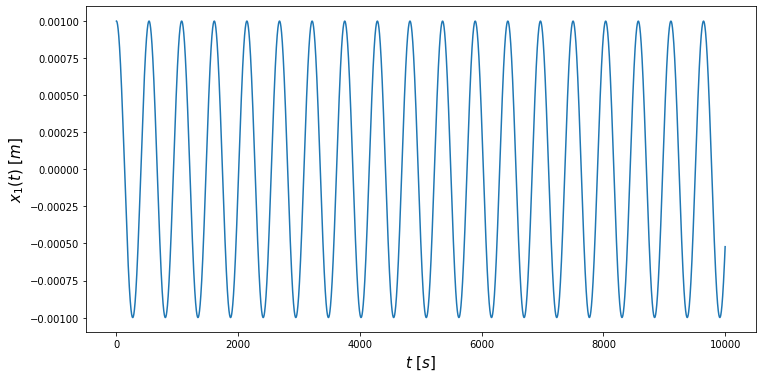

In [25]:
# Gráfica posición contra tiempo primera masa 
plt.figure(figsize = (12,6))
plt.plot(x[:,0])
plt.xlabel("$t$ $[s]$", size = 15)
plt.ylabel("$x_1(t)$ $[m]$", size = 15)

Text(0, 0.5, '$x_2(t)$ $[m]$')

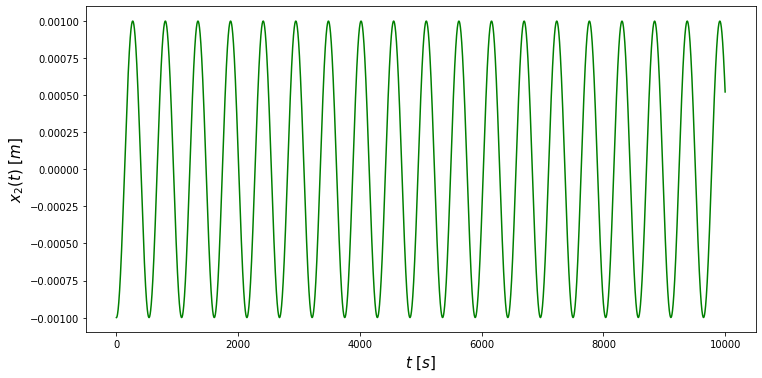

In [24]:
# Gráfica posición contra tiempo segunda masa 
plt.figure(figsize = (12,6))
plt.plot(x[:,1],'g')
plt.xlabel("$t$ $[s]$", size = 15)
plt.ylabel("$x_2(t)$ $[m]$", size = 15)

Text(0, 0.5, '$v_1(t)$ $[m/s]$')

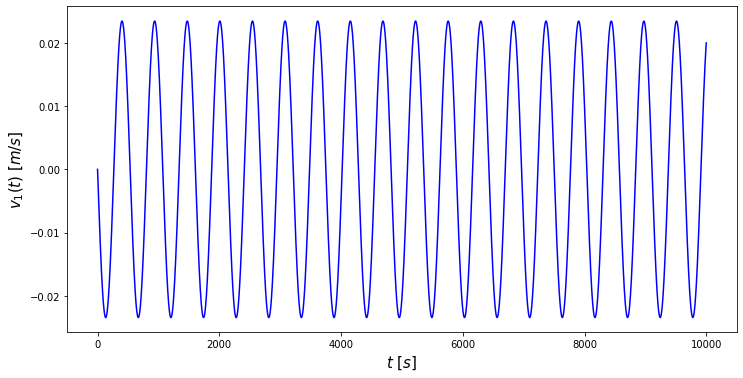

In [26]:
# Gráfica velocidad contra tiempo primera masa 
plt.figure(figsize = (12,6))
plt.plot(x[:,2], 'b')
plt.xlabel("$t$ $[s]$", size = 15)
plt.ylabel("$v_1(t)$ $[m/s]$", size = 15)

Text(0, 0.5, '$v_2(t)$ $[m/s]$')

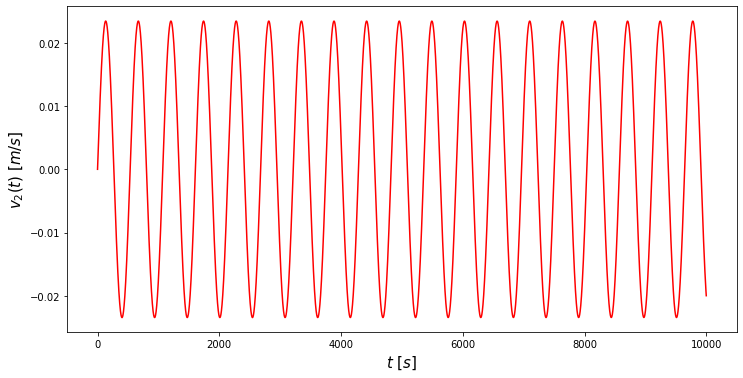

In [27]:
# Gráfica velocidad contra tiempo segunda masa 
plt.figure(figsize = (12,6))
plt.plot(x[:,3], 'r')
plt.xlabel("$t$ $[s]$", size = 15)
plt.ylabel("$v_2(t)$ $[m/s]$", size = 15)